In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
df = tesla.history(period="5y")

df.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-06-19 00:00:00-04:00,15.007333,15.184667,14.737333,15.095333,98626500,0.0,0.0
2019-06-20 00:00:00-04:00,14.866667,15.126667,14.423333,14.641333,177952500,0.0,0.0
2019-06-21 00:00:00-04:00,14.414667,14.812000,14.366667,14.790667,123031500,0.0,0.0
2019-06-24 00:00:00-04:00,14.882667,15.057333,14.734667,14.909333,86262000,0.0,0.0
2019-06-25 00:00:00-04:00,14.959333,15.022667,14.632667,14.650667,92731500,0.0,0.0


In [3]:
# Data Cleaning
print(df.isnull().sum())
print(df.dtypes)

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64
Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


In [4]:
# Data Exploration
detailed_stats = df.describe().T
detailed_stats['skew'] = df.skew()
detailed_stats['kurtosis'] = df.kurtosis()
print(detailed_stats)

               count          mean           std           min           25%  \
Open          1259.0  1.863220e+02  9.703431e+01  1.424000e+01  1.267913e+02   
High          1259.0  1.904646e+02  9.906681e+01  1.433467e+01  1.323483e+02   
Low           1259.0  1.818592e+02  9.469470e+01  1.406667e+01  1.228773e+02   
Close         1259.0  1.862526e+02  9.686708e+01  1.409333e+01  1.262963e+02   
Volume        1259.0  1.287976e+08  8.310164e+07  2.940180e+07  7.857645e+07   
Dividends     1259.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Stock Splits  1259.0  6.354249e-03  1.642760e-01  0.000000e+00  0.000000e+00   

                       50%           75%           max       skew    kurtosis  
Open          2.034100e+02  2.513350e+02  4.114700e+02  -0.326066   -0.710763  
High          2.080000e+02  2.565533e+02  4.144967e+02  -0.323341   -0.698368  
Low           1.985000e+02  2.462350e+02  4.056667e+02  -0.335222   -0.730639  
Close         2.033300e+02  2.517700e+0

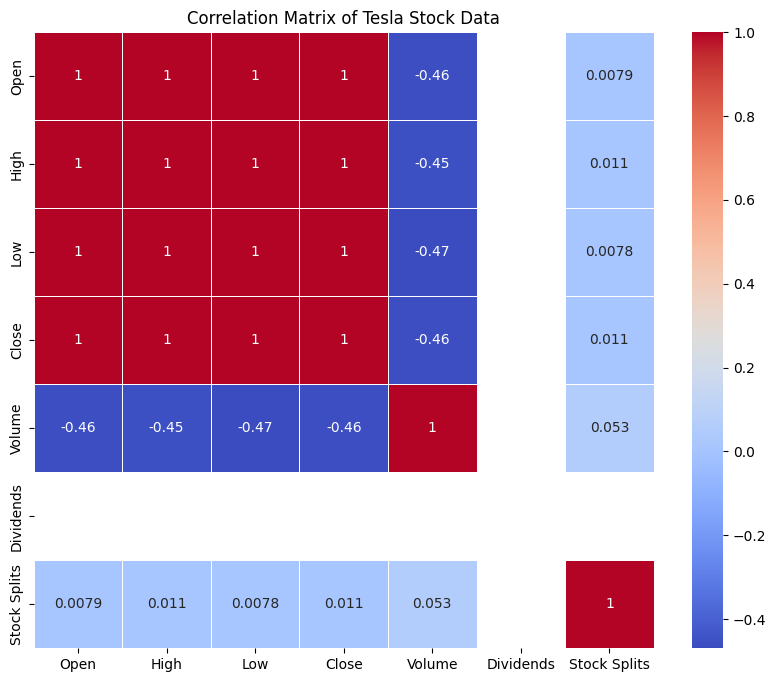

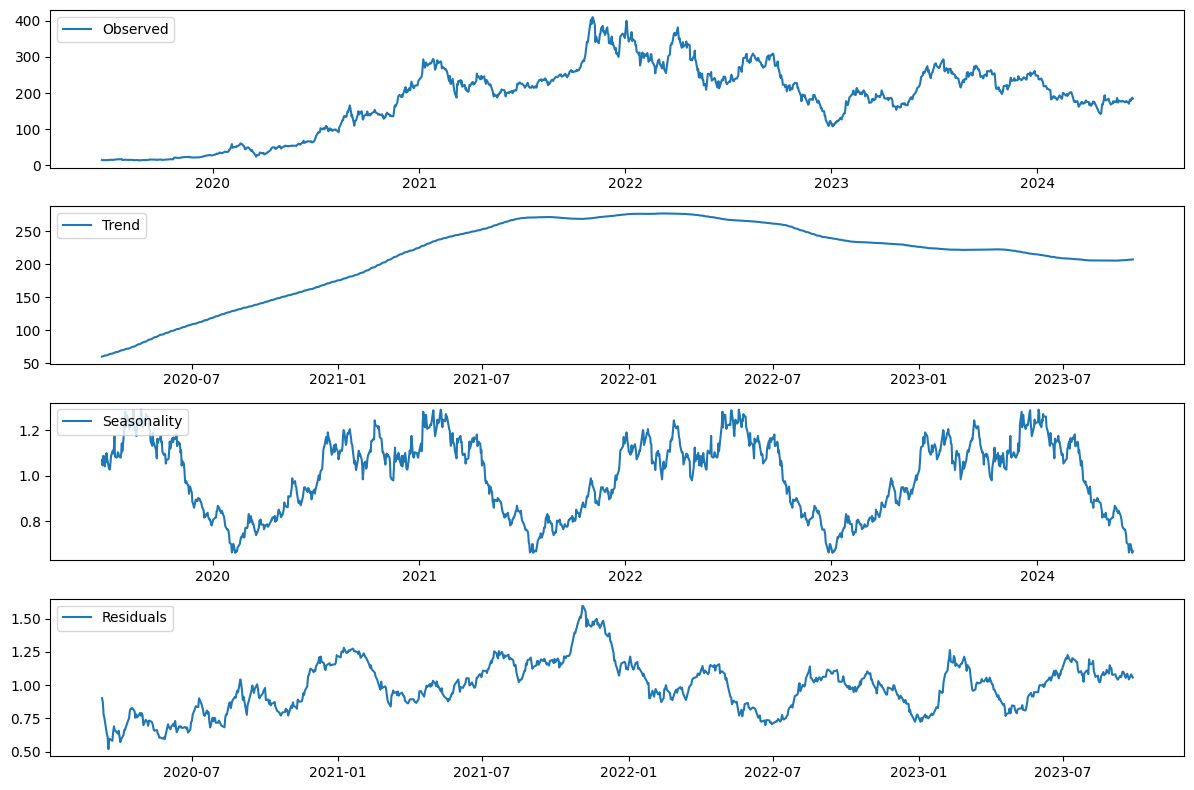

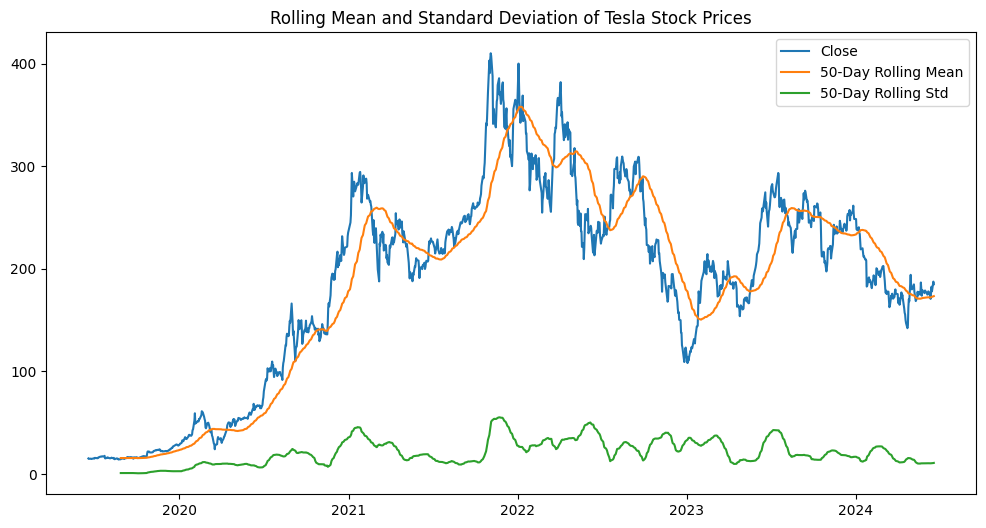

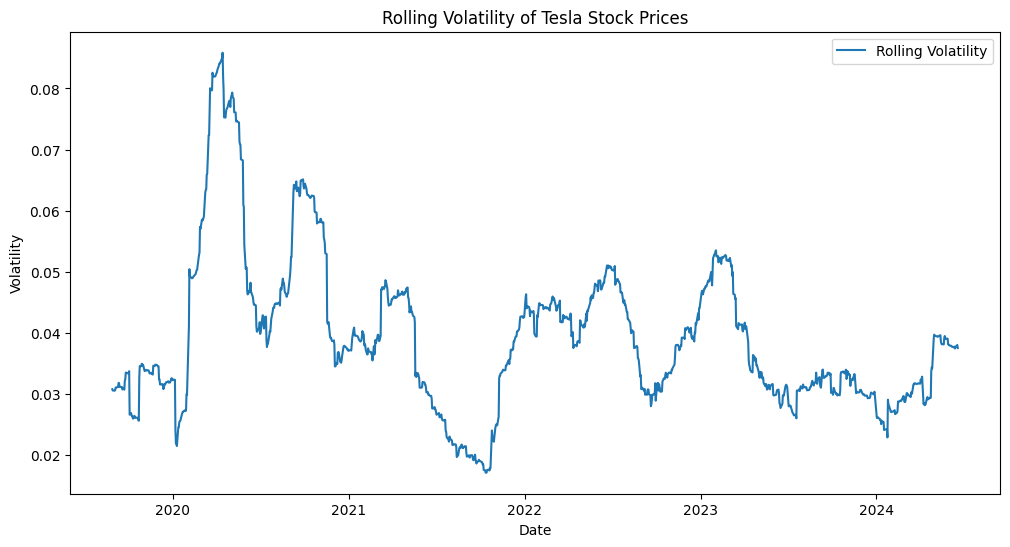

<Figure size 1200x600 with 0 Axes>

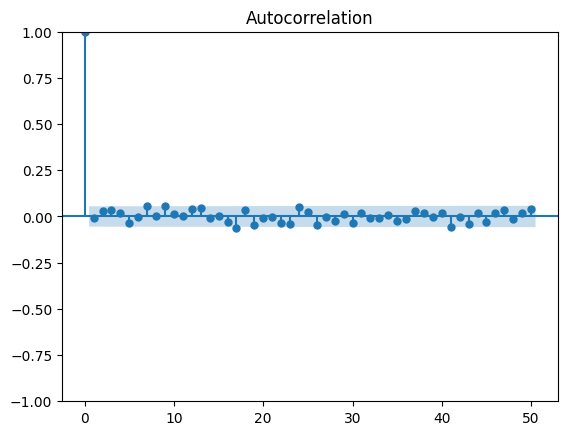

<Figure size 1200x600 with 0 Axes>

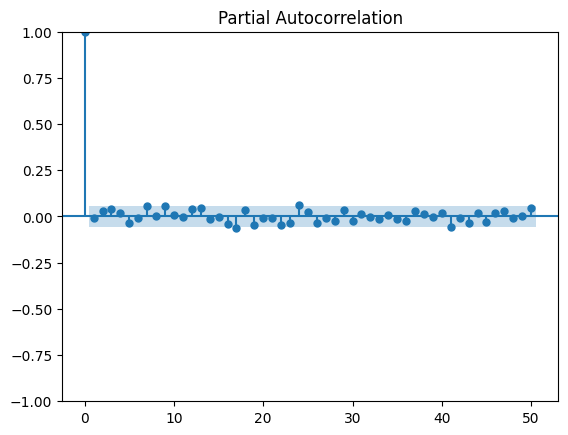

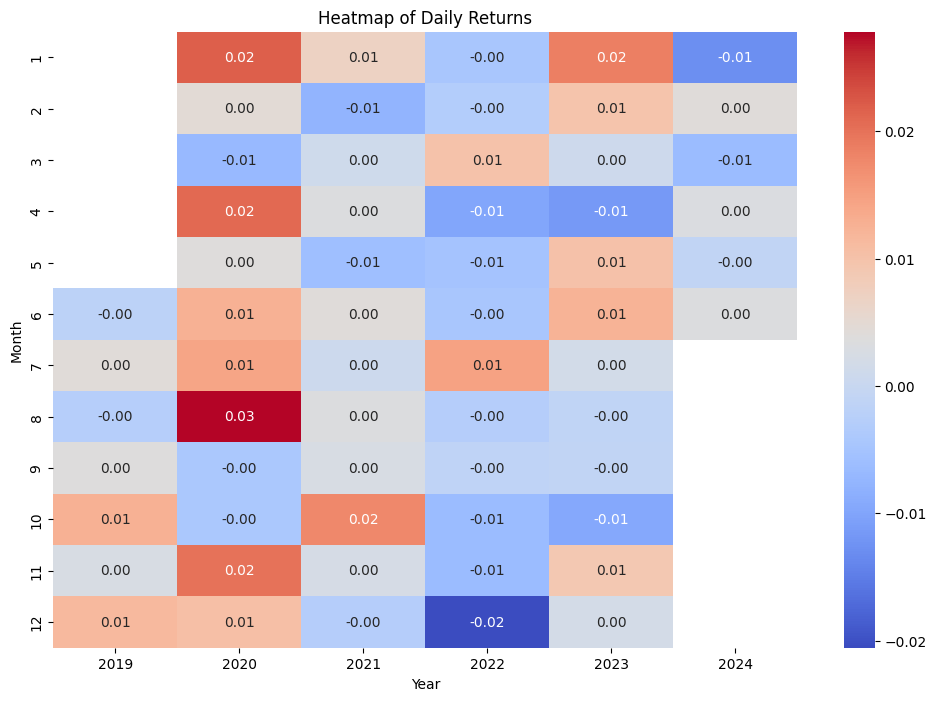

In [5]:




# Correlation Analysis
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Tesla Stock Data')
plt.show()

# Time Series Decomposition
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=365)

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Volatility Analysis
rolling_mean = df['Close'].rolling(window=50).mean()
rolling_std = df['Close'].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close')
plt.plot(rolling_mean, label='50-Day Rolling Mean')
plt.plot(rolling_std, label='50-Day Rolling Std')
plt.title('Rolling Mean and Standard Deviation of Tesla Stock Prices')
plt.legend()
plt.show()

df['Log Return'] = np.log(df['Close'] / df['Close'].shift(1))
rolling_volatility = df['Log Return'].rolling(window=50).std()

plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility, label='Rolling Volatility')
plt.title('Rolling Volatility of Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 6))
plot_acf(df['Log Return'].dropna(), lags=50)
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(df['Log Return'].dropna(), lags=50)
plt.show()

# Heatmap of Returns
df['Daily Return'] = df['Close'].pct_change()
daily_returns = df['Daily Return'].dropna().reset_index()
daily_returns['Year'] = daily_returns['Date'].dt.year
daily_returns['Month'] = daily_returns['Date'].dt.month
monthly_returns_mean = daily_returns.groupby(['Year', 'Month'])['Daily Return'].mean().reset_index()
pivot_table = monthly_returns_mean.pivot(index='Month', columns='Year', values='Daily Return')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Daily Returns')
plt.show()




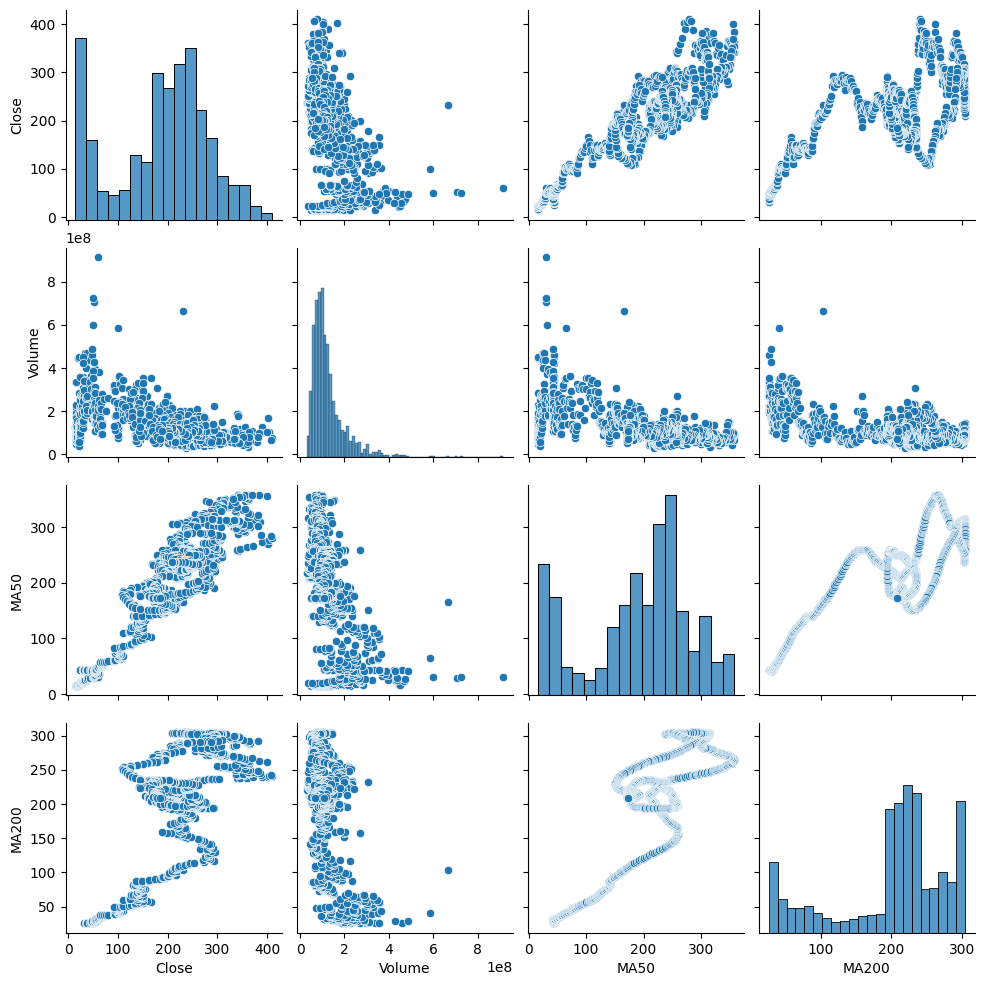

In [6]:
# Feature Engineering
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df.head()
# Pair Plot
sns.pairplot(df[['Close', 'Volume', 'MA50', 'MA200']])
plt.show()